___

# K Nearest Neighbors

We work with a simple dataset representing gene expression levels.

Gene expression levels are calculated by the ratio between the expression of the target gene (i.e., the gene of interest) and the expression of one or more reference genes (often household genes). This dataset is synthetic and specifically designed to show some of the strengths and limitations of using KNN for Classification.

More info on gene expression: https://www.sciencedirect.com/topics/biochemistry-genetics-and-molecular-biology/gene-expression-level

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Data

In [2]:
df = pd.read_csv('gene_expression.csv')

In [3]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


**Explore if the dataset has any missing data points and create a statistical summary of the numerical features as shown below.**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


In [5]:
#Statistical summary
df.describe()

,Gene One,Gene Two,Cancer Present
count,3000.000000,3000.000000,3000.000000
mean,5.600133,5.410467,0.500000
std,1.828388,1.729081,0.500083
min,1.000000,1.000000,0.000000
25%,4.300000,4.000000,0.000000
50%,5.600000,5.400000,0.500000
75%,6.900000,6.700000,1.000000
max,10.000000,10.000000,1.000000


## Exploratory Data Analysis

Let's use seaborn to explore the data!

**Create bar plot that shows the total counts per target label.**

In [6]:
df['Cancer Present'].value_counts()

1    1500
0    1500
Name: Cancer Present, dtype: int64

<AxesSubplot:xlabel='Cancer Present', ylabel='count'>

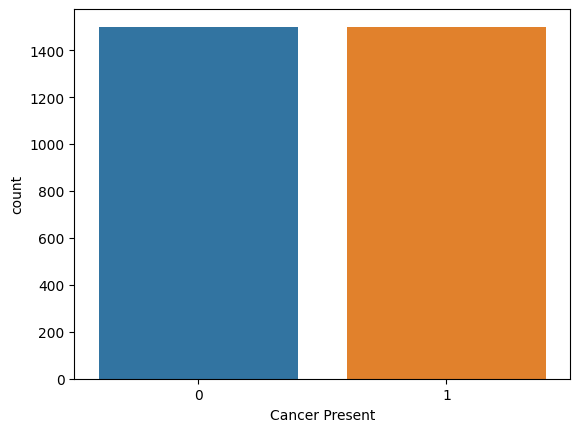

In [7]:
sns.countplot(x='Cancer Present',data=df)

**Explore the relationship between the two genes** 

PS: you can use a pairplot or a simple scatterplot.

<AxesSubplot:xlabel='Gene One', ylabel='Gene Two'>

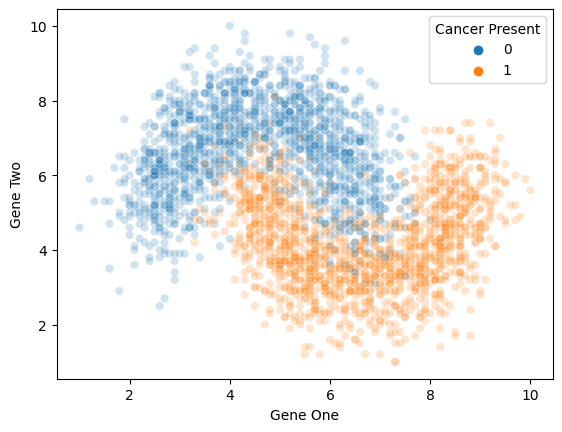

In [44]:
sns.scatterplot(x='Gene One', y='Gene Two', hue='Cancer Present', data=df, alpha = 0.2)

**Explre the relationship between both features on a specific area x [2, 6] and y [3, 10]**

Ps: Use x/ylim.

(3.0, 10.0)

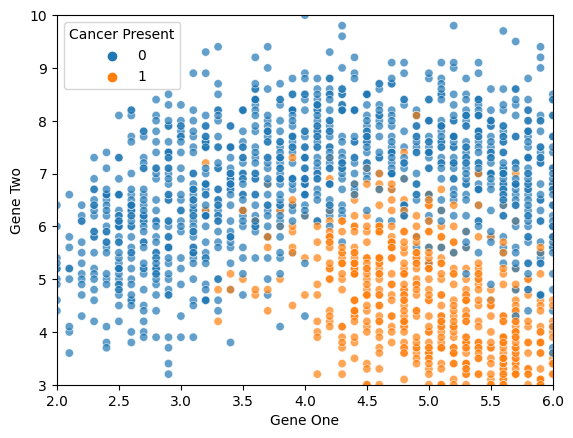

In [39]:
sns.scatterplot(x='Gene One',y='Gene Two',hue='Cancer Present',data=df, alpha=0.7)
plt.xlim(2,6)
plt.ylim(3,10)

**Create a heatmap that displays the correlation between all the columns.**

<AxesSubplot:>

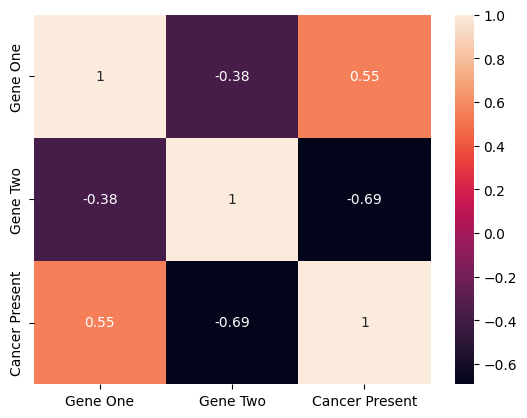

In [10]:
sns.heatmap(df.corr(), annot=True)

# K Nearest Neighbors

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

**Split Data into X and Y**

In [11]:
X = df.drop('Cancer Present',axis=1)
y = df['Cancer Present']

**Split the data into training set and testing set using train_test_split**

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

## Standardize the Variables

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

In [16]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Using KNN (K = 1)

Remember that we are trying to come up with a model to predict whether someone will TARGET CLASS or not. We'll start with k=1.

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
knn = KNeighborsClassifier(n_neighbors=1)

In [19]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [20]:
pred = knn.predict(X_test)

## Predictions and Evaluations

**Let's now evaluate our KNN model! on the remaining 10% of the data, the test set.**

**Create the following evaluations:**

* Confusion Matrix Array
* Confusion Matrix Plot
* Classification Report

In [21]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

**Confusion Matrix**

In [22]:
print(confusion_matrix(y_test,pred))

[[149  14]
 [ 17 120]]


**Plot Confusion Matrix**

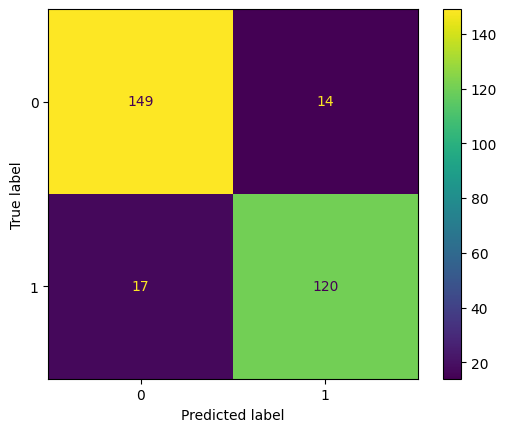

In [23]:
# Helps us plot the confusion matrix of a specific model. 
plot_confusion_matrix(knn,X_test,y_test)

**F1-Score, Precision and Recall**

In [24]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       163
           1       0.90      0.88      0.89       137

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



**The above matrix calculates scores per class and gives an average of differences. If we want precision or recall scores using the formulas we seen in theory :**

In [25]:
from sklearn.metrics import precision_score, recall_score

In [26]:
precision_score(y_test, pred)

0.8955223880597015

In [27]:
recall_score(y_test, pred)

0.8759124087591241

**Calculate the accuracy**

In [28]:
accuracy_score(y_test, pred)

0.8966666666666666

## Choosing a K Value

Let's go ahead and use the elbow method to pick a good K Value:

In [29]:
# Empty array to store error scors of each tested K value.
error_rate = []
# Number of K values to test.
K = 60

for i in range(1, K):
    # Create a KNN model with K = i 
    knn = KNeighborsClassifier(n_neighbors=i)
    # Fit model on training data.
    knn.fit(X_train,y_train)
    # Predict on test data.
    pred_i = knn.predict(X_test)
    # Calculate the mean of differences between predictions and test set. Assign it to error_rate array.
    test_error = 1 - accuracy_score(y_test, pred_i)
    error_rate.append(test_error)

**Plot evolution of error rate vs k value**

Text(0, 0.5, 'Error Rate')

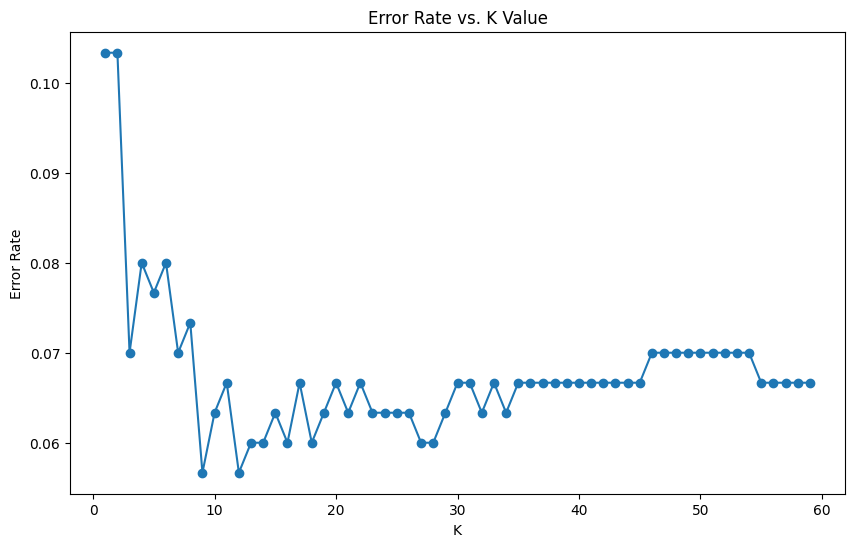

In [30]:
plt.figure(figsize=(10,6))
plt.plot(range(1,60),error_rate, marker='o')
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Using Best value for K

In [31]:
knn = KNeighborsClassifier(n_neighbors=9)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K?')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K?


[[156   7]
 [ 10 127]]


              precision    recall  f1-score   support

           0       0.94      0.96      0.95       163
           1       0.95      0.93      0.94       137

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



In [32]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve

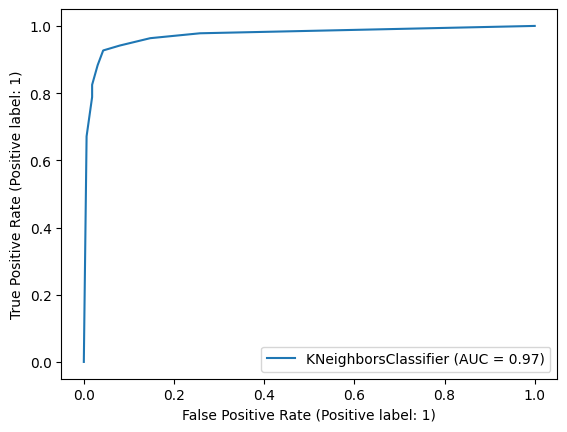

In [33]:
# Creates an ROC curve plot
plot_roc_curve(knn,X_test,y_test)

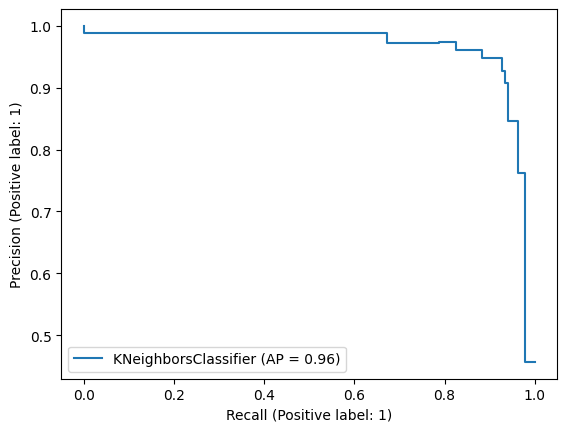

In [34]:
# Measure trade off between precision recall using precision recall curve
plot_precision_recall_curve(knn,X_test,y_test)

**Final Task: A new patient came in, with the following features can we predict if he has cancer or not ?**

    Gene 1       7
    Gene 2       2.2

In [35]:
patient = [[7, 2.2]]

**Predict Class label of the patient**

In [36]:
knn.predict(patient)

array([1], dtype=int64)

**Predict the probability of class label**

In [37]:
knn.predict_proba(patient)

array([[0., 1.]])

# Great job!

We were able to squeeze some more performance out of our model by tuning to a better K value!

----